In [36]:
import numpy as np
import pandas as pd

In [37]:
y = pd.read_csv('promoter_processed.csv')

In [38]:
embeddings = np.load('all_embeddings_100m_mean.npy')

In [4]:
embeddings.shape

(6646, 1280)

In [5]:
y.shape

(6646, 2)

In [39]:
num_features = embeddings.shape[1]
embeddings_df = pd.DataFrame(data=embeddings, columns=[f'feature_{i}' for i in range(num_features)])
combined_df = pd.concat([y, embeddings_df], axis=1)
combined_df

,Sequences,Strengths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,tagatgtccttgattaacaccaaaattaaaccttttaaaaaccagg...,1,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
1,aaagaaaataattaattttacagctgttaaaccaaacggttataac...,1,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
2,ctgctgttccttgcgatcgaaaagatcaagggcggaccggtatccg...,1,-0.946999,-0.824914,-0.470066,-0.244439,-0.711039,-0.126911,0.556981,-0.249472,...,0.678970,-0.519048,-0.002377,0.652751,-0.911779,-0.233074,0.052144,0.210270,-0.042073,-0.101237
3,gcggaagcacaaattgcaccaggtacggaactaaaagccgtagatg...,1,-0.936847,-0.781433,-0.525665,-0.327091,-0.618907,-0.142214,0.555200,-0.227962,...,0.693298,-0.431873,-0.034174,0.701798,-0.867468,-0.268788,-0.084448,0.357413,-0.061708,-0.153779
4,aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...,1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6642,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6643,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114
6644,gatactagatgtagttgaaaaaagattcaaccacacaatatatagc...,-1,-0.939334,-0.752792,-0.355315,-0.209782,-0.644720,-0.147364,0.547578,-0.244620,...,0.592513,-0.447916,-0.154701,0.645616,-0.978199,-0.352725,0.029607,0.186247,-0.076592,-0.107114


In [40]:

from sklearn.model_selection import train_test_split

# Assuming you have a Pandas DataFrame called 'df' with your data
# Replace 'your_target_column' with the actual column name you are trying to predict
target_column = 'log2_foldchange'

# Shuffle the DataFrame
df_shuffled = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into train, validation, and test sets
train_ratio = 0.7
validation_ratio = 0.1
test_ratio = 0.2

# Calculate the split indices
train_idx, test_idx = train_test_split(df_shuffled.index, test_size=0.2, random_state=42)

# Create the train, validation, and test DataFrames
df_train = df_shuffled.loc[train_idx]
df_test = df_shuffled.loc[test_idx]

# Optional: If you want to drop the index columns (reset_index adds a new index column)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Display the sizes of the resulting DataFrames
print(f"Train set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")

Train set size: 5316
Test set size: 1330


In [41]:
# Save DataFrames to CSV files
df_train.to_csv('train_data_clf_mean.csv', index=False)

df_test.to_csv('test_data_clf_mean.csv', index=False)

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [43]:
# okay, now train a classifier model on the train_data df_train
df_train['Strengths'] = df_train['Strengths'].replace(-1, 2)
X = df_train.drop(columns=['Sequences','Strengths'], axis=1)
y = df_train['Strengths']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



In [47]:
#tune multiclass xgboost
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'objective': ['multi:softmax'],
    'num_class': [3],
    'random_state': [42]
}

# Step 4: Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 7: Make Predictions with the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the Best Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'num_class': 3, 'objective': 'multi:softmax', 'random_state': 42, 'subsample': 0.9}
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



In [49]:
# try other classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Step 4: Train Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_pred))

# Step 5: Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Random Forest Accuracy: 0.6757518796992481
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064


SVM Accuracy: 0.6625939849624061
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       265
           1       0.00      0.00      0.00       228
           2       0.71      1.00      0.83       571

    accuracy                           0.66      1064
   macro avg       0.41      0.50      0.45      1064
weighted avg       0.51      0.66      0.57      1064



c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


XGBoost Accuracy: 0.6757518796992481
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

# Step 4: Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 7: Make Predictions with the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the Best Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



In [51]:
# try feature selection and training
from sklearn.feature_selection import RFECV

# Step 3: Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Initialize RFECV for feature selection
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)




NameError: name 'features' is not defined

In [53]:
selected_features

Index(['feature_685'], dtype='object')

In [52]:
# Step 5: Get selected features
selected_features = X.columns[rfecv.support_]

# Step 6: Train Random Forest Classifier on the selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train[selected_features], y_train)

# Step 7: Make Predictions with the Selected Model
y_pred = rf_model_selected.predict(X_test[selected_features])

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43       265
           1       0.57      0.24      0.34       228
           2       0.71      1.00      0.83       571

    accuracy                           0.68      1064
   macro avg       0.62      0.53      0.53      1064
weighted avg       0.64      0.68      0.63      1064



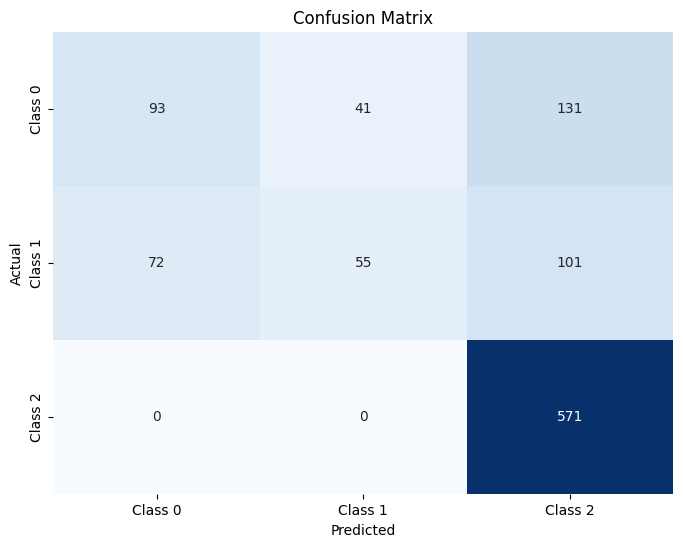

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# try binary classification for promoter vs. nonpromoter

df_train['Strengths'] = df_train['Strengths'].replace(1, 0)

# Step 2: Convert all 2 to 1
df_train['Strengths'] = df_train['Strengths'].replace(2, 1)

X = df_train.drop(columns=['Sequences','Strengths'], axis=1)
y = df_train['Strengths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       493
           1       0.71      1.00      0.83       571

    accuracy                           0.78      1064
   macro avg       0.86      0.76      0.76      1064
weighted avg       0.84      0.78      0.77      1064



Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67       289
           1       0.53      0.28      0.37       237

    accuracy                           0.56       526
   macro avg       0.55      0.54      0.52       526
weighted avg       0.56      0.56      0.53       526



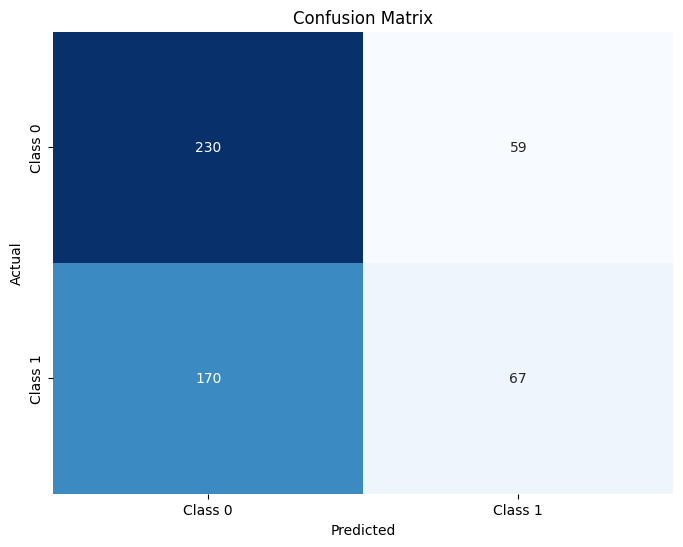

In [56]:
# train another model on weak vs. strong

df = pd.read_csv('train_data_clf_mean.csv')
df.drop(df[df['Strengths'] == -1].index, inplace=True)

X = df.drop(columns=['Sequences','Strengths'], axis=1)
y = df['Strengths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67       289
           1       0.53      0.28      0.37       237

    accuracy                           0.56       526
   macro avg       0.55      0.54      0.52       526
weighted avg       0.56      0.56      0.53       526



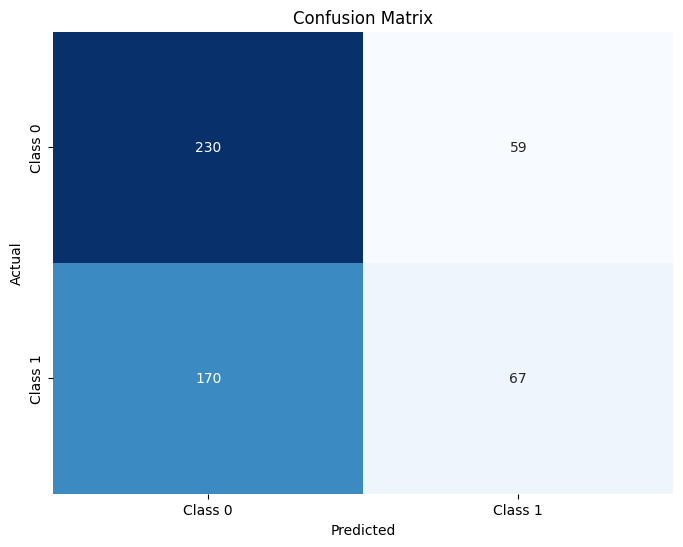

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

# Step 4: Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Step 5: Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 7: Make Predictions with the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the Best Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# tune and improve

# try different models etc.